# Paper Review: [AdEMAMix](https://arxiv.org/pdf/2409.03137) from Apple (M. Pagliardini, P. Ablin, D. Grangier)

## Adam optimizer:

Extension of stochastic gradient descent (SGD) where the learning rate adapts itself.

Combines 2 gradient descent methodologies.  Momentum and RMSProp

Adam maintains an exponentially decaying average of past gradients $m_t$ to incorporate in current momentum:

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t\, \ldots\, (1)$$

$g_t, \beta_1$ are gradient at time step $t$ and a constant parameter (from Andrew Ng's course + Adam paper ~0.9 is reasonable value) that controls the learning rate, respectively.

Adam also include the concepts from RMSProp where this optimization algorithm adapts the learning rate for each parameter individually based on the magnitude of recent gradients. In RMSPRop we compute the Moving Average (MA) of the squared gradients to normalize the updates:

$$v_t = \beta_2 v_{t-1} + (1-\beta _2) g_t^2\, \ldots \, (2)$$

$g_t^2$ is the **element-wise** square of the gradient, $\beta _2$ (from Andre Ng's course + Adam paper, set it around 0.999) controls the decay rate of the squared gradients.

These $m_t, v_t$ are often referred to in literature as first and second moment. Adam keep tracks of the (exponential moving) average of the gradients and squared gradients.

Since both $m_t, v_t$ are initialized to 0, there would be a tendency to be biased towards 0. To remove this bias we implement

$$\widehat{m_t} = \frac{m_t}{1-\beta _1^t}, \, \widehat{v_t} = \frac{v_t}{1-\beta _2^t}\, \ldots \, (3)$$

Let;s see this by setting $m_0 = 0$:

$$\begin{align}m_t &= \beta_1 m_{t-1} + (1-\beta_1) g_t \\ m_1 &= (1-\beta_1) g_1 \\ m_2 &= \beta_1 m_1 + (1-\beta _1)g_2 = \beta_1 \, (1-\beta _1)g_1 + (1-\beta_1)g_2\end{align}\, \ldots \, (4)$$

If we do compare with the bias correction scenario, we see something different:

$$\begin{align}\widehat{m_1} &= \frac{m_1}{1-\beta_1} =\frac{(1-\beta _1)\, g_1}{1-\beta _1}= g_1 \\ \widehat{m_2} &= \frac{m_2}{1-\beta _1^2} = \frac{\beta _1 (1-\beta _1)g_1 + (1-\beta _1)g_2}{(1-\beta _1)(1+\beta _1)} = \frac{\beta _1\, g_1 \, + \, g_2}{1+\beta _1}\end{align}\, \ldots \, (5)$$

The bias correction leads to more unbiased estimates of the gradients at the early stages.

With these we can write the parameter update rule for Adam as:

$$\theta_{t+1} = \theta _t - \frac{\eta}{\sqrt{\widehat{v_t}} + \epsilon}\, \widehat{m_t}\, \ldots \, (6)$$


Adam optimizer with the regularization parameter (i.e. AdamW) can be written as:

$$\theta_{t+1} = \theta _t - \eta \left(\frac{\widehat{m_t}}{\sqrt{\widehat{v_t}} + \epsilon} + \lambda \, \theta _t\right)\, \ldots \, (6.1)$$



## Exponential Moving Average

We need to get accustomed to the intuition behind EMA. If we look back at Eq. 1 and 2, we see that both $m_t, v_t$ follow a recursive relation where the past observation $(m_{t-1}, v_{t-1})$ are scaled by a factor $(\beta )$ and the current observation is scaled by $(1-\beta)$. Where the exponential part comes in? To see this, let's proceed with one of them, $m_t$.

Since we stated that we initialize the $m_t$ with 0;

$$\begin{align}m_1 &= (1-\beta _1)g_1 \\ m_2 &=\beta_1 m_1 + (1-\beta _1)g_2 = \beta _1(1-\beta _1)g_1 + (1-\beta _1)g_2 = (1-\beta _1)\, (g_2 + \beta _1 g_1) \\ m_3 &= \beta _1(1-\beta _1)(g_2  + \beta _1  g_1) + (1-\beta _1)g_3 = (1-\beta _1)(g_3 + \beta _1 g_2 + \beta _1^2 g_1)\\ \vdots \\ m_t &= (1-\beta _1)\, (g_t + \beta _1 g_{t-1} + \beta _1^2 g_{t-2} + \cdots + \beta _1^{t-1} g_1) \\ m_t &= (1-\beta _1)\, \sum_{i=0}^t \, \beta _1^{t-i} g_i\end{align} \, \ldots \, (7)$$

Another way as it is written in the AdEMAMix paper, if we have a set of past gradients

$$\mathcal{G}^T = \{g^{(0)}, \cdots \, , g^{(T)} \}$$


then,

$$EMA (\beta, \mathcal{G}^T) = \sum_{i=0}^T \, (1-\beta)\, \beta ^{i} g^{(T-i)}\, \ldots \, (8) $$



This reveals the key concept behind the EMA, the current observations are more important and the past observations, as we move back in time, are less and less important. The multiplication term $β^t$ goes exponentially down with the increase of t, as the multiplicative factor $0<\beta<1$ is less than $1$, the effect of $g_{t-1}$ on $m_t$ is less than $g_t$ and so on....




In [ ]:
=import matplotlib.pyplot as plt

import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

path_to_files = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive


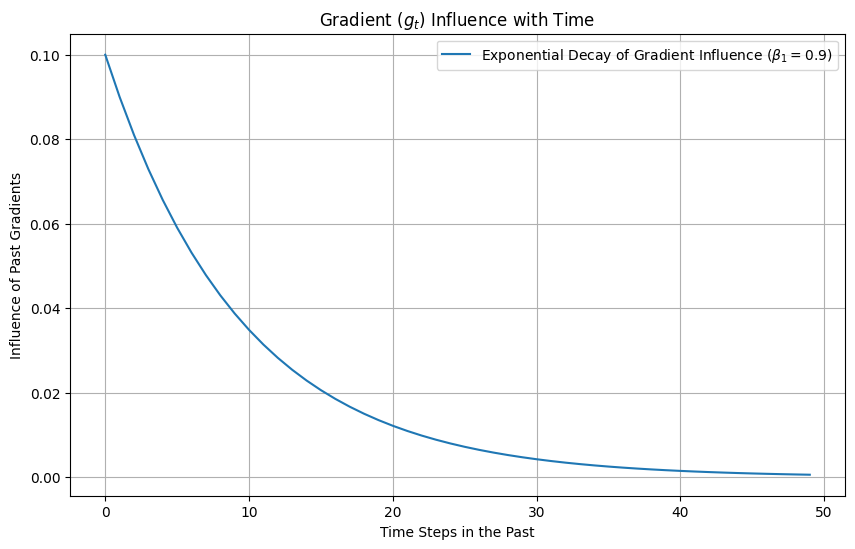

In [6]:
# We can plot the final expression in Eq.  7
beta1 = 0.9  # Exponential decay rate



epochs = 50  # Number of epochs (iterations)
weights = [(1 - beta1) * (beta1 ** i) for i in range(epochs)]

# print (weights)


plt.figure(figsize=(10, 6))
plt.plot(weights, label=r"Exponential Decay of Gradient Influence $(\beta _1 = 0.9)$")
plt.xlabel('Time Steps in the Past')
plt.ylabel('Influence of Past Gradients')
plt.title('Gradient $(g_t)$ Influence with Time')
plt.legend()
plt.grid(True)
plt.savefig(path_to_files + 'grad_EMA.png', dpi=200)
plt.show()

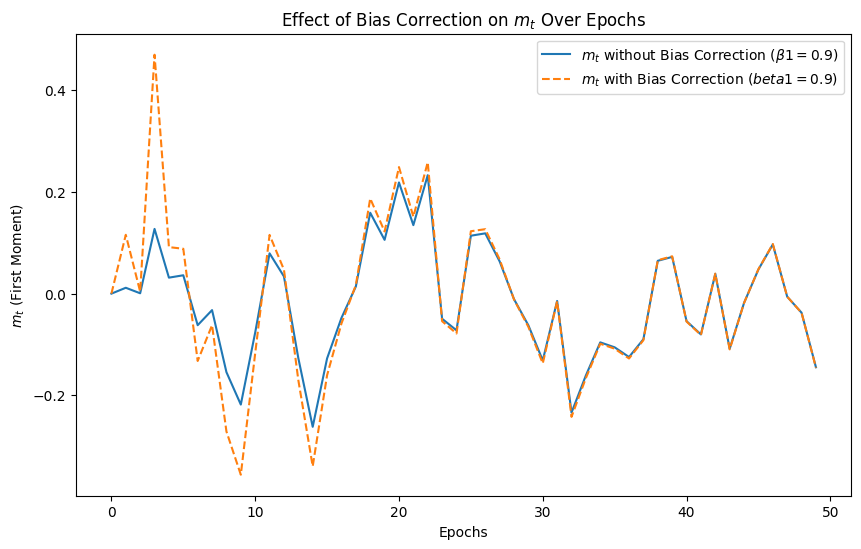

In [7]:
## what about the m_t and and m_t with bias correction over time (i.e. epochs)


# Parameters Same as before
beta1 = 0.9  # Exponential decay rate for the first moment
epochs = 50  # Number of epochs (iterations)
g_t = np.random.randn(epochs)  # random gradients

# Initialize m_t and corrected m_t
m_t = np.zeros(epochs)
m_t_corrected = np.zeros(epochs)

# Calculate m_t and m_t_corrected for each epoch
for t in range(1, epochs):
    m_t[t] = beta1 * m_t[t - 1] + (1 - beta1) * g_t[t]
    m_t_corrected[t] = m_t[t] / (1 - beta1**t)  # Applying bias correction

# Plot m_t with and without bias correction
plt.figure(figsize=(10, 6))
plt.plot(m_t, label=r"$m_t$ without Bias Correction $(\beta1 = 0.9)$")
plt.plot(m_t_corrected, label=r"$m_t$ with Bias Correction $(beta1 = 0.9)$", linestyle='--')
plt.xlabel('Epochs')
plt.ylabel(r'$m_t$ (First Moment)')
plt.title(r'Effect of Bias Correction on $m_t$ Over Epochs')
plt.legend()
plt.savefig(path_to_files + 'First_moment_epochs.png', dpi=200)
plt.show()

## Main Idea Behind AdEMAMix





> A single EMA cannot both give a significant weight to recent gradients, and give a non-negligible weight to older gradient.  

We need to clarify this concept. Looking back at the past equations, you can probably get an idea already but let's make it even more clear.

Let's consider Eq. 1, when we increase $\beta$ from 0.9 to 0.99 definitely the term $(1-\beta)\, g_t$ contributes less towards $m_t$, where $g_t$ is the current gradient. Also increasing $\beta$ increases the contribution of the term $\beta \, m_{t-1}$, i.e. the effect of past gradients. This is actually also shown in Eq. 7.


So it is indeed difficult to give equal importance to recent gradients and contribution from older gradients.

But how much do older gradients contribute? The researchers through experimentation found that for language modeling and computer vision tasks, the gradients can stay relevant for "tens of thousand of steps".


The researchers show that when they increase $\beta$ i.e. give more importance to past gradients, the performance actually worsens with AdamW as optimizer. They argue that it is not because that we are trying to include outdated gradient information forcefully but it is because increasing beta reduces sensitivity towards current gradient. In the plot below (titled: Exponential Decay of Weights in EMA), similar for Fig. 3a in the paper we  highlight this factor. The authors mention:

> A small β (e.g. 0.9) will give a high weight to the immediate past and negligible weights to older timesteps. In contrast, a high β (e.g. 0.9999) is giving a relatively uniform, yet non-negligible weight to all gradients. No β value can simultaneously give a high weight to the immediate past and a non-negligible weight to very old timesteps.

----------------------------------

## Proposal In the Paper

Here the authors suggest:

> A linear combination between a “fast-changing” (e.g. $β_1 = 0.9$) and a “slow-changing” (e.g. $β_3 = 0.9999$) EMA allows the iterate to beneficiate from (i) the great speedup provided by the larger (slow-changing) momentum,
while (ii) still being reactive to small changes in the loss landscape (fast-changing).

-------------

What about this "slow-changing" and "fast changing" EMA?

**Fast-Changing EMA (with $β_1=0.9$):**

* The "fast-changing" EMA uses a lower value for the decay rate, $β_1=0.9$ (compared to 0.9999), which gives more weight to recent gradients and 'forgets' older gradients.

* This EMA is responsive to small, _recent_ changes in the loss landscape because it places significant emphasis on the most recent gradients.

**Slow-Changing EMA (with $β_3=0.9999$):**

The "slow-changing" EMA uses a much higher value for the decay rate $β_3​=0.9999$, which means it retains past gradient information for a much longer time.

* As this EMA changes slowly, naturally it should be useful for loss-landscapes which are long and contain many flat regions.



## Half Life for Fast and Slow Changing EMAs:

Previously, we asked how much older gradients they contribute? Given the EMA formula, we can do some simple calculation as discussed in the paper.

Given that the weighting factor for the gradients is $\sum \limits_{i=0}^T\beta ^i \, (1-\beta)$, we can use the geometric series formula for the summation.

The number of successive previous steps receiving a cumulative weight of $0.5$ can be denoted by $t_{\text{half}}$. Let's try to find this $t_{\text{half}}$

$$W = 0.5 = \sum \limits_{i=0}^{t_{\text{half}}}\beta ^i \, (1-\beta)$$

We can use the summation rule for geometric series:

$$S_n = a_0 r^0 + a_1 r^1 + a_2 r^2 + \cdots + a_nr^n = a\left(\frac{1-r^{n+1}}{1-r}\right)$$

$$W = 0.5 = \sum \limits_{i=0}^{t_{\text{half}}}\beta ^i \, (1-\beta) = (1-\beta) \times \beta ^0 \left(\frac{1-\beta ^{t_{\text{half}}+1}}{1-\beta}\right) = 1-\beta^{t_{\text{half}}+1}$$

Taking natural Log on both sides:

$$\ln(0.5) = (t_{\text{half}}+1)\, \ln(\beta) \, \rightarrow \, t_{\text{half}} = \frac{\ln(0.5)}{\ln \beta} - 1$$

For $\beta _1 = 0.9$, we have $t_{\text{half}} \approx 5.5788$, for $\beta _3 = 0.9999, \, t_{\text{half}} \approx 6930.1252$.

\

This highlights small $\beta = 0.9$, half of the weight is given to the previous six gradients, while for higher $\beta = 0.9999$, this is spread over 6930 steps. For small $\beta$, we focus on the immediate gradients, for larger $\beta$ we also include contribution from the older gradients.

------------------------------------------

## AdEMAMix

With these concepts backing the idea of the necessity of two EMAs with small and large βs, the authors introduce the formulation for AdEMAMix:


$$\begin{align} m_1^{(t)} &= \beta _1 m_1^{(t-1)} \, +\, (1-\beta _1) g^{(t)}, \, \, \hat{m_1}^{(t)} = \frac{m_1^{(t)}}{1-\beta _1^t}, \\ \color{yellow}{m_2}^{\color{yellow}{(t)}} &= \color{yellow}{\beta _3 m_2^{(t-1)}} \, \color{yellow}+\, \color{yellow}{(1-\beta _3) g^{(t)}}  \\ v^{(t)} &= \beta _2 m_1^{(t-1)} \, +\, (1-\beta _1) g^{(t)},  \, \, \hat{v}^{(t)} = \frac{v^{(t)}}{1-\beta _2^t}, \\ \theta ^{(t)} &= \theta ^{(t-1)} - \eta \left(\frac{\hat{m_1}^{(t)} + \color{yellow}{\alpha m_2^{(t)}}}{\sqrt{\hat{v^{(t)}}}\, +\, \epsilon} \, + \, \lambda \theta ^{(t-1)}\right)\end{align}\, \ldots \, (9)$$


Colored parts are the new additions comparing with AdamW:


$$\begin{align} m_1^{(t)} &= \beta _1 m_1^{(t-1)} \, +\, (1-\beta _1) g^{(t)}, \, \, \hat{m_1}^{(t)} = \frac{m_1^{(t)}}{1-\beta _1^t}, \\ v^{(t)} &= \beta _2 m_1^{(t-1)} \, +\, (1-\beta _1) g^{(t)},  \, \, \hat{v}^{(t)} = \frac{v^{(t)}}{1-\beta _2^t}, \\ \theta ^{(t)} &= \theta ^{(t-1)} - \eta \left(\frac{\hat{m_1}^{(t)}} {\sqrt{\hat{v^{(t)}}}\, +\, \epsilon} \, + \, \lambda \theta ^{(t-1)}\right)\end{align}$$


For the new multiplicative factor $\alpha$ in Eq. 9, the authors found that $\alpha \in \left[4, 10\right]$ works best.




The conclusion from the paper:

> we find that old gradients can be leveraged to efficiently train LLMs and ViTs. Our proposed optimizer combines two momentum terms. A slow (large $β$) momentum gathers information over many timestep, while a fast (low $β$) momentum can adapt the trajectory of the iterates to the rapidly changing loss landscape. We demonstrate the superiority of our optimizer over AdamW through a set of experiments on text modeling and image classification. We moreover
reveal how our optimizer forgets the training data at a slower pace.



To highlight the last point, the authors gave an example in the paper for training an LLM (RedPajama) with a hold out batch B. First, they separately trained with AdamW and AdEMAMix model on a RedPajama dataset which didn't see the batch B. Then this batch was introduced at different times during training (et at epoch 90K, 170K, 230K etc.). They show that: For both these optimizers, there was a rapid decrease of the loss on B right after the training on B. The sharpness of this decrease in loss is more with AdamW compared to AdEMAMix. So one might think that AdamW helps the LLM to learn better but with AdamW, the loss on B then goes back up faster, which the authors interpret as the model forgetting B faster. This is in contrast with training curves for AdEMAMix, which are smoother, with the loss on B goes back up slower, and ultimately this hold out batch B had a bigger impact on the training when using
AdEMAMix—as the loss stays lower compared to training with AdamW. They also found that the forgetting behaviour evolves during training and the model forgets slower when this hold-out batch was fed to training at later iterations.

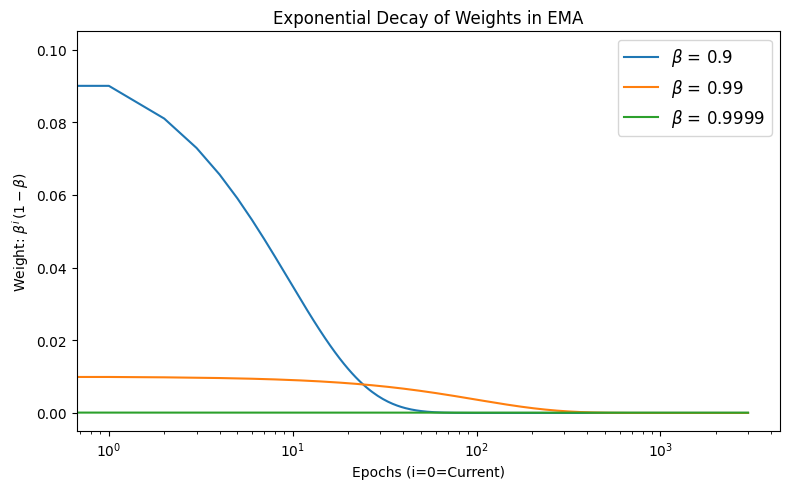

In [8]:


# Define beta values to illustrate different decay rates
beta_values = [0.9, 0.99, 0.9999]

# some number of epochs #
# plot in the paper contains 10k epochs (Fig. 3a)
max_epoch = 3000
steps = np.arange(0, max_epoch + 1)


plt.figure(figsize=(8, 5))

# weights for different betas
for beta in beta_values:
    weights = (beta ** steps) * (1 - beta)
    plt.plot(steps, weights,
             label=f'$\\beta$ = {beta}')

plt.title('Exponential Decay of Weights in EMA',
          fontsize=12)
plt.xlabel('Epochs (i=0=Current)',
           fontsize=10)
plt.ylabel(r'Weight: $\beta^i \, \left(1 - \beta\right)$',
           fontsize=10)
plt.legend(fontsize=12)
#plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.savefig(path_to_files + 'Fast_Slow_EMA.png', dpi=200)
plt.show()


## $\beta _3$ Scheduler

Since $\beta _3$ is the new addition in the new optimizer AdEMAMix, the authors gave brilliant justification for its chosen scheduling strategy. Since $\beta _3$ is now a function of training epochs, we can write it like that:

$$\beta _3^{(t)} = f_{\beta _3}\, (t, \beta _3, \beta _{\text{start}, T_{\beta _3}}) = \text{min}\left(\text{exp}\left(\frac{\ln \beta _{\text{start}}\, \ln \beta _3}{\left(1-\frac{t}{T_{\beta _3}}\right) \ln \beta _3 \, +\,  \frac{t}{T_{\beta _3}}\, \ln \beta _{\text{start}}}\right), \beta _3\right)\, \ldots \, (10)$$


where $T_{\beta _3} = T = $ training iterations and $\beta _{\text{start}}$ is set to $\beta _1 = 0.9$.

Here we need to ask why the authors chose the exponential function for the scheduler. They gave a nice intuition builder:

Let's say we start from $\beta = 0.9$ and increase it by $\delta\beta = 0.0001$, now we have $\beta ' = 0.9001$; If we look back at the half life equation this will cause barely any increase in $t_{\text{half}}$

$$t_{\text{half}} = \frac{\ln 0.5}{\ln 0.9} -1 = 5.5788; \, \, t'_{\text{half}} = \frac{\ln 0.5}{\ln 0.9001} -1 = 5.58575$$

But for the same $\delta\beta$ when our $\beta$ is at $0.999$ then

$$t_{\text{half}} = \frac{\ln 0.5}{\ln 0.999} -1 = 691.80055; \, \, t'_{\text{half}} = \frac{\ln 0.5}{\ln 0.9991} -1 = 768.816908$$

that's a staggering $77$ iteration increase for the half life. So a linear scheduler for $\beta _3$ is definitely not a good choice because what we actually want is that $t_{\text{half}}$ increases linearly so that as we increase $\beta _3$ we are linearly increasing the effect of past gradients via $t_{\text{half}}$. The point here is that we want to accumulate weights from past gradients in the EMA linearly as a function of the iteration. As at the beginning of the training $\beta _3 = \beta _{\text{start}} = \beta _1 = 0.9$, our $t_{\text{half}}$ is small as we focus on the recent gradients and as training iteration increases we want to accumulate weights from more past gradients.

**Derivation of the Scheduler Formula**

$$f(\beta) = \frac{\ln 0.5}{\ln \beta} -1\, \ldots \, (11)$$

We want this function to increase linearly: The inverse of this function:

$$f(\beta) + 1 = \frac{\ln 0.5}{\ln \beta} \rightarrow \ln \beta = \ln 0.5^{\frac{1}{1+f(\beta)}} \rightarrow f^{-1}(t) = 0.5^{\frac{1}{1+t}}\, \ldots \, (12)$$

As $t$ increases $f^{-1}(t)$ also increases.

What we want is a linear (smooth) transformation of $f(\beta)$ from $\beta_{\text{start}}$ to $\beta_{\text{end}}$, so we introduce an interpolation parameter $\mu \in [0, 1]$ and we want a smooth transition from $f(\beta _{\text{start}})$ to $f(\beta _{\text{end}})$ such as

$$(1-\mu) \, f(\beta_{\text{start}}) \, +\, \mu f(\beta_{\text{end}})\, \ldots \, (13)$$

When $\mu = 0$, we are at the $f(\beta _{\text{start}})$  and for $\mu = 1$ we are at the $f(\beta _{\text{end}})$

But this $f(\beta)$ is essentially $t_{\text{half}}$ which increases linearly but we want this for $\beta$, so we use the inverse transformation to get back from $t_{\text{half}}$ or $f(\beta)$ space to $\beta$ space.

$$f^{-1}((1-\mu) \, f(\beta_{\text{start}}) \, +\, \mu f(\beta_{\text{end}}))\, \ldots \, (14)$$

The inverse function $f^{−1}$ maps this linear increase in $t_{\text{half}}$ back to a corresponding value of $β$.

Let's get through the calculation to reach to Eq. 10. Using the definition of the inverse function  

$$\beta (\mu) = 0.5^{\frac{1}{1 + \left[(1-\mu)\, f(\beta_{\text{start}}) \, +\, \mu \, f(\beta _{\text{end}})\right]}}\, \ldots \, (15)$$

Let's simplify the term on the exponent:

$$\begin{align} p &= \frac{1}{1 + \left[(1-\mu)\, f(\beta_{\text{start}}) \, +\, \mu \, f(\beta _{\text{end}})\right]} \\ &=\frac{1}{1+\left[(1-\mu)\, \left(\frac{\ln 0.5}{\ln \beta _{\text{start}}} - 1 \right)\, +\, \mu \left(\frac{\ln 0.5}{\ln \beta _{\text{end}}} - 1 \right) \right]} \\ &= \frac{1}{1+ \frac{\ln 0.5}{\ln \beta _{\text{start}}} - 1 - \mu \frac{\ln 0.5}{\ln \beta _{\text{start}}} + \mu +\mu \frac{\ln 0.5}{\ln \beta _{\text{end}}} - \mu} \\ &= \frac{\ln \beta _{\text{start}} \, \ln \beta _{\text{end}}}{\ln 0.5\, \ln \beta _{\text{end}} - \mu \ln 0.5 \ln \beta _{\text{end}} + \mu \ln 0.5 \ln \beta _{\text{start}}} \\ &= \frac{\ln \beta _{\text{start}} \, \ln \beta _{\text{end}}}{\ln 0.5\, [(1 - \mu)\, \ln \beta _{\text{end}}  + \mu \ln \beta _{\text{start}}]} \end{align}\, \ldots \, (16) $$

Let's use this in Eq. 15 and take log on both sides:

$$\begin{align}\ln \beta(\mu) &= \ln (0.5^{p}) \\ & = p \ln 0.5 \\ &= \frac{\ln \beta _{\text{start}} \, \ln \beta _{\text{end}}}{\ln 0.5\, [(1 - \mu)\, \ln \beta _{\text{end}}  + \mu \ln \beta _{\text{start}}]} \times \ln 0.5 \\ \beta (\mu) &= \exp \left(\frac{\ln \beta _{\text{start}} \, \ln \beta _{\text{end}}}{ [(1 - \mu)\, \ln \beta _{\text{end}}  + \mu \ln \beta _{\text{start}}]} \right)\end{align}\, \ldots \, (17)$$

This already looks very similar to Eq. 10, all we need is to set $\beta _{\text{end}} = \beta _3, \, \mu = \frac{t}{T_{\beta _3}}$

In [10]:
mu_arr = np.linspace(0, 1, 200)

def beta(mu, b_s=0.9, b_e = 0.9999):
  num = np.log(b_s) * np.log(b_e)
  denom = ((1-mu) * np.log(b_e)) + mu * np.log(b_s)
  beta = np.exp(num/denom)
  return beta
all_beta = []

for i in range(len(mu_arr)):
  betas = beta(mu_arr[i])
  all_beta.append(betas)



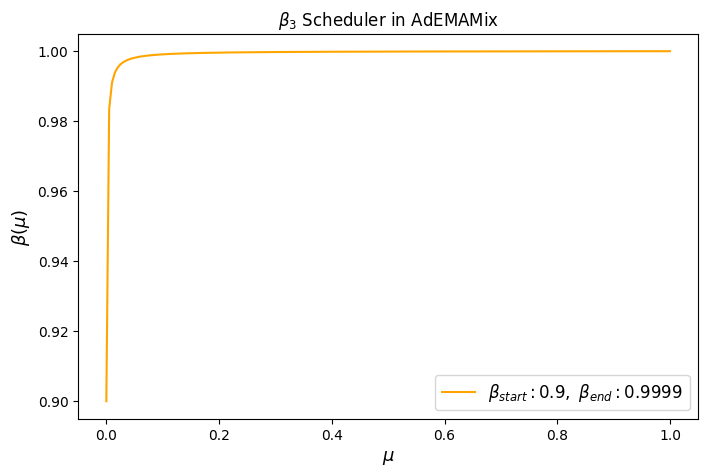

In [11]:
fig = plt.figure(figsize=(8, 5))
plt.plot(mu_arr, all_beta, ls='-', color='orange', label=r'$\beta _{start}: 0.9, ~\beta _{end}:0.9999$')
plt.xlabel(r'$\mu$', fontsize=13)
plt.ylabel(r'$\beta(\mu)$', fontsize=13)
plt.legend(fontsize=12)
plt.title(r'$\beta _3$ Scheduler in AdEMAMix', fontsize=12)
plt.savefig(path_to_files + 'beta_scheduler.png', dpi=200)
plt.show()